# Data Preparation Notebook
This notebook demonstrates the data preparation process, including cleaning, preprocessing, and exploratory data analysis (EDA).

## Step 1: Import Required Libraries
We will import the necessary libraries for data manipulation, visualization, and preprocessing.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## Step 2: Load the Raw Data
We will load the raw dataset for processing.

In [2]:
# Load the raw data
raw_data_path = '../data/raw/kaggle_churn.csv'
df = pd.read_csv(raw_data_path)
print(f'Dataset loaded with shape: {df.shape}')
df.head()

Dataset loaded with shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 3: Handle Missing Values
We will handle missing values using imputation techniques.

In [3]:
# Handle missing values
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])
print('Missing values handled.')

Missing values handled.


## Step 4: Standardize Numerical Attributes
We will standardize numerical attributes to ensure they are on the same scale.

In [4]:
# Standardize numerical attributes
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print('Numerical attributes standardized.')

Numerical attributes standardized.


## Step 5: Encode Categorical Variables
We will encode categorical variables using one-hot encoding or label encoding.

In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() <= 50:
        df = pd.get_dummies(df, columns=[col], drop_first=True)
    else:
        df[col] = label_encoder.fit_transform(df[col])
print('Categorical variables encoded.')

Categorical variables encoded.


## Step 6: Perform EDA
We will perform exploratory data analysis to identify trends, distributions, and outliers.

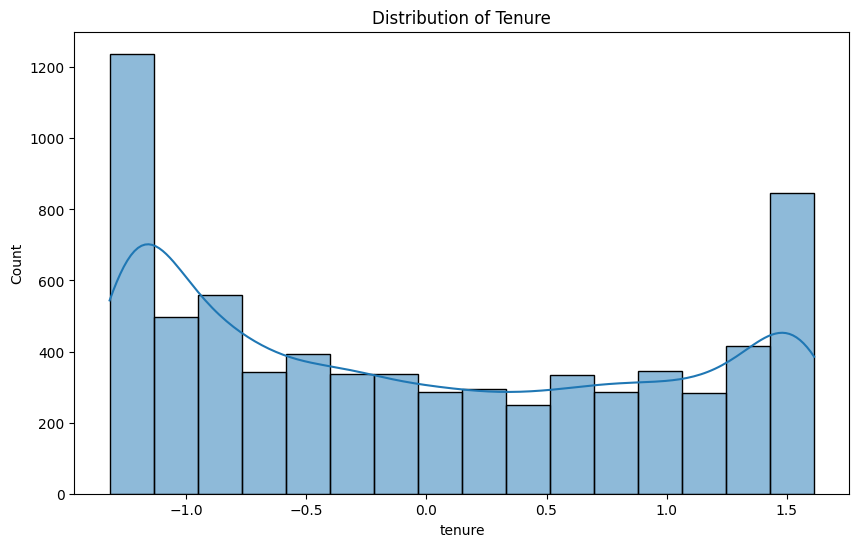

Columns 'Churn' or 'MonthlyCharges' are missing in the dataset.


<Figure size 1000x600 with 0 Axes>

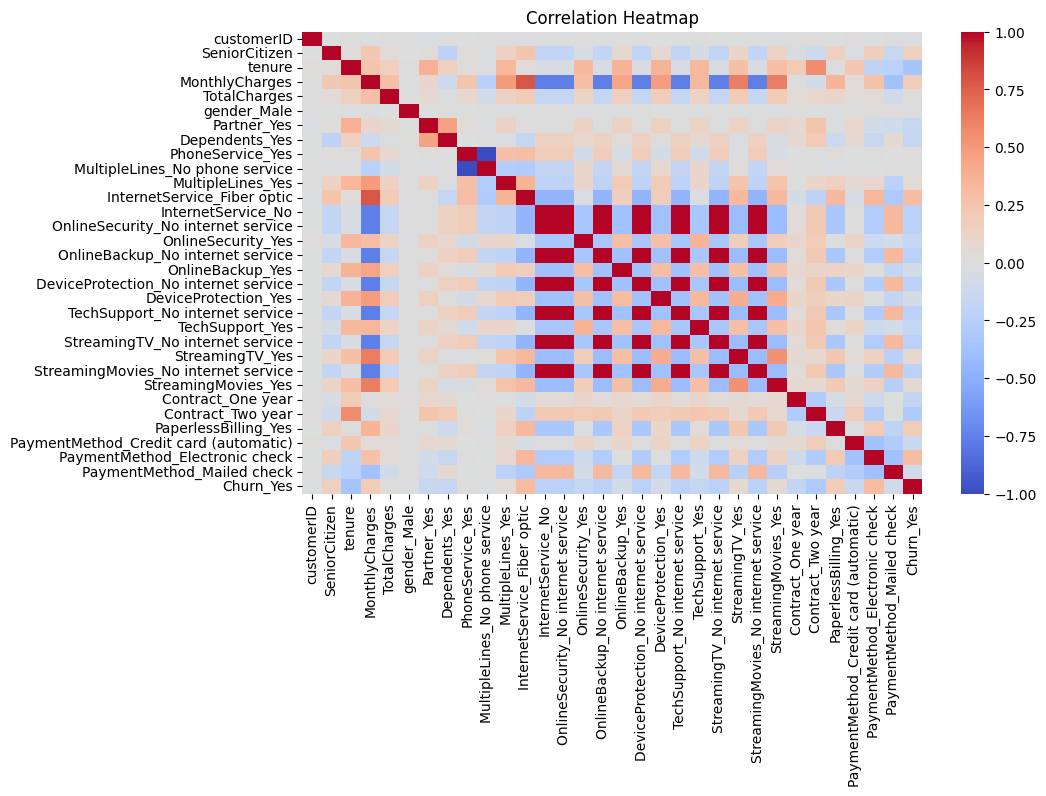

In [8]:
# EDA: Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.show()

plt.figure(figsize=(10, 6))
if 'Churn' in df.columns and 'MonthlyCharges' in df.columns:
    sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
    plt.title('Monthly Charges by Churn')
else:
    print("Columns 'Churn' or 'MonthlyCharges' are missing in the dataset.")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Step 7: Save the Cleaned Dataset
We will save the cleaned dataset for further transformations.

In [10]:
# Save the cleaned dataset
cleaned_data_path = '../data/processed/cleaned_data.csv'
df.to_csv(cleaned_data_path, index=False)
print(f'Cleaned dataset saved to {cleaned_data_path}')

Cleaned dataset saved to ../data/processed/cleaned_data.csv
